In [36]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [37]:
dataset = mnist.load_data()

In [38]:
train, test = dataset
X_train, y_train = train
X_test, y_test = test

In [39]:
X_test.shape

(10000, 28, 28)

In [40]:
import matplotlib.pyplot as plt

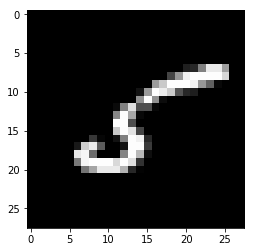

In [41]:
plt.imshow(X_train[11], cmap="gray")
plt.show()

In [42]:
from scipy.stats import bernoulli as coin_flip

In [43]:
points = []

for i in range(28):
    for j in range(28):
        
        if coin_flip.rvs(X_train[11][i][j] / 255) == 1:
            points.append([j / 28, (-i + 28) / 28])

points = np.array(points)

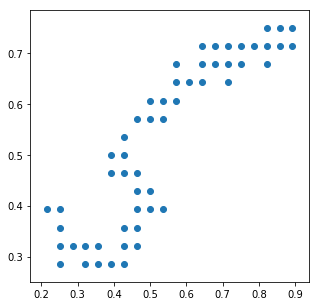

In [44]:
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [45]:
def make_2d_mnist(X, y):
    n_obs = X.shape[0]
    w, h = X.shape[2], X.shape[1]
    
    sample = []
    
    for i in range(n_obs):
        points = []

        for j in range(h):
            for k in range(w):
        
                if coin_flip.rvs(X[i][j][k] / 255) == 1:
                    points.append([k / w, (-j + h) / h])

        points = np.array(points)
        sample.append(points)
        
    return sample, y

In [46]:
sample, labels = make_2d_mnist(X_train[:100], y_train[:100])

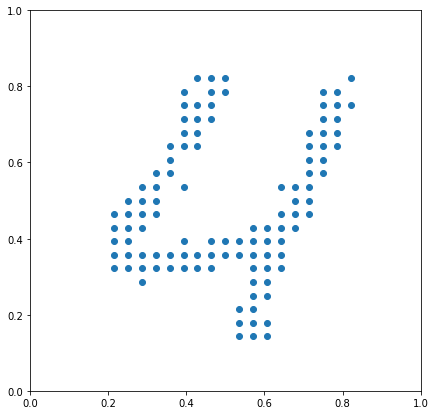

4


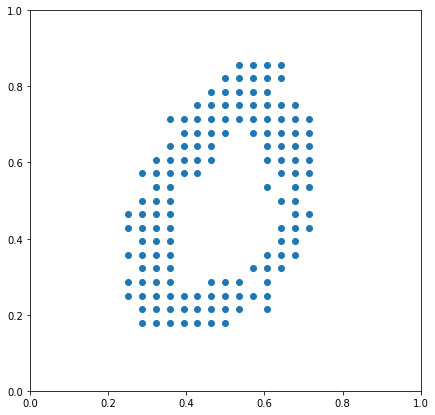

0


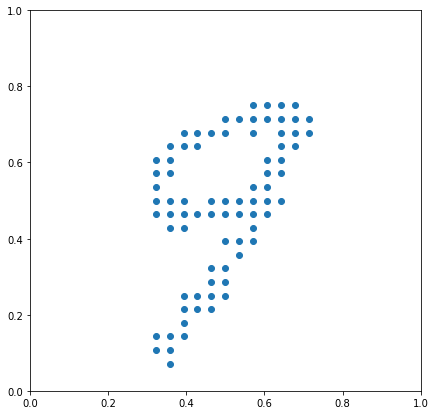

9


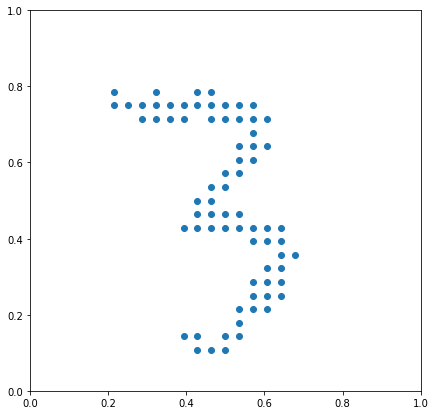

3


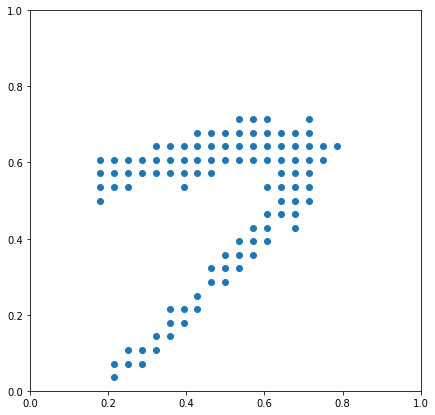

7


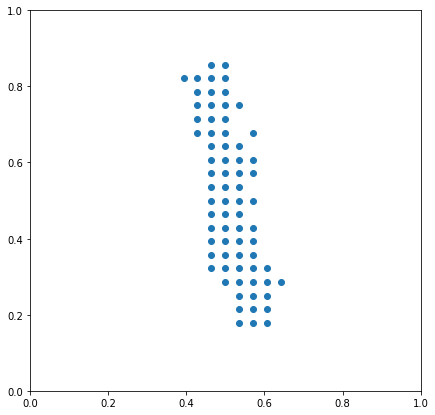

1


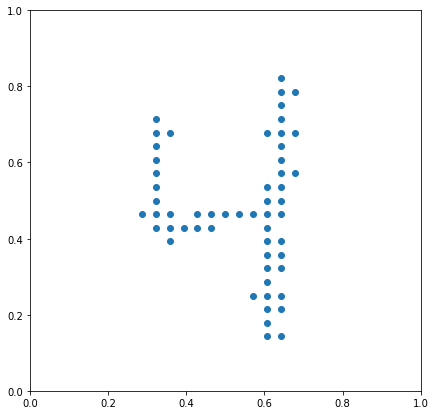

4


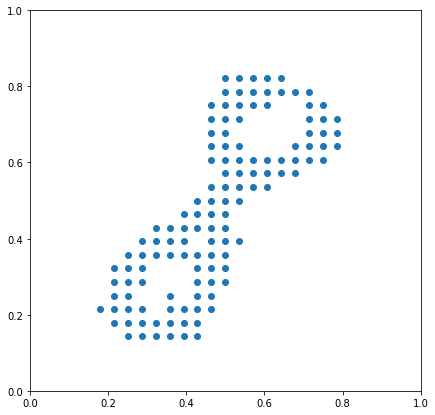

8


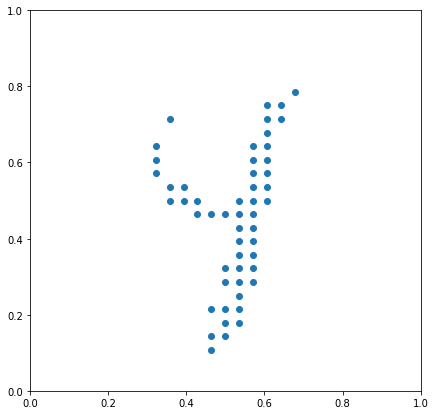

4


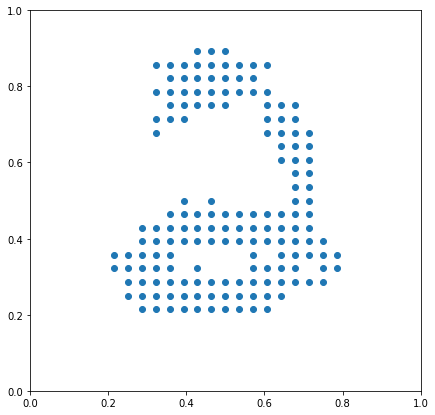

2


In [47]:
ix = np.random.choice(100, size=10, replace=False)
  
for i in ix:
    plt.figure(figsize=(7, 7))
    plt.scatter(sample[i][:, 0], sample[i][:, 1])
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()
    print(labels[i])